

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


### get url

In [61]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
startdate = "'2016-12-08'"
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-08'


In [62]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [64]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [65]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [66]:
df = pd.read_csv(url)

In [67]:
df.shape

(91, 16)

#### wow, 5 days > 1000 reports

In [68]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6610037,12/09/2016 12:06:31 AM,NaN,12/09/2016 12:06:31 AM,Open,accepted,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,"289 FELL ST, SAN FRANCISCO, CA, 94102",5,Civic Center,"(37.775745700859, -122.422340168166)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65fd3da19793c74c55aa/report.jpg
1,6610036,12/09/2016 12:05:27 AM,NaN,12/09/2016 12:05:27 AM,Open,accepted,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,"280 FELL ST, SAN FRANCISCO, CA, 94102",5,Civic Center,"(37.776102204386, -122.422451594666)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65b83da19793c74c55a0/report.jpg
2,6610018,12/08/2016 11:09:29 PM,NaN,12/09/2016 12:41:03 AM,Open,Open,PUC - Water - Graffiti Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_hydrant - Not_Offensive,Intersection of GEARY ST and JONES ST,6,Lower Nob Hill,"(37.7867296545835, -122.413161270099)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a589b3da19793c74c5557/report.jpg


In [69]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [70]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6610037,2016-12-09 00:06:31,NaT,2016-12-09 00:06:31,Open,accepted,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,"289 FELL ST, SAN FRANCISCO, CA, 94102",5,Civic Center,"(37.775745700859, -122.422340168166)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65fd3da19793c74c55aa/report.jpg
1,6610036,2016-12-09 00:05:27,NaT,2016-12-09 00:05:27,Open,accepted,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,"280 FELL ST, SAN FRANCISCO, CA, 94102",5,Civic Center,"(37.776102204386, -122.422451594666)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65b83da19793c74c55a0/report.jpg
2,6610018,2016-12-08 23:09:29,NaT,2016-12-09 00:41:03,Open,Open,PUC - Water - Graffiti Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_hydrant - Not_Offensive,Intersection of GEARY ST and JONES ST,6,Lower Nob Hill,"(37.7867296545835, -122.413161270099)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584a589b3da19793c74c5557/report.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=8.0, right=8.0
  'left=%s, right=%s') % (left, right))


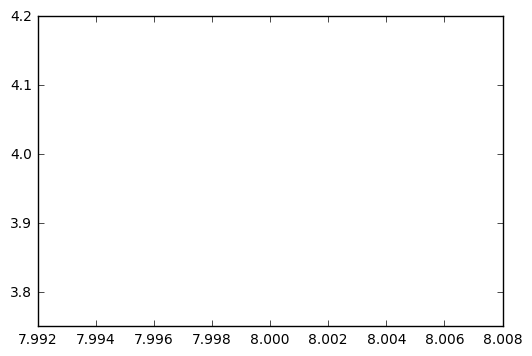

In [71]:
df.Closed.dt.day.value_counts().sort_index().plot()

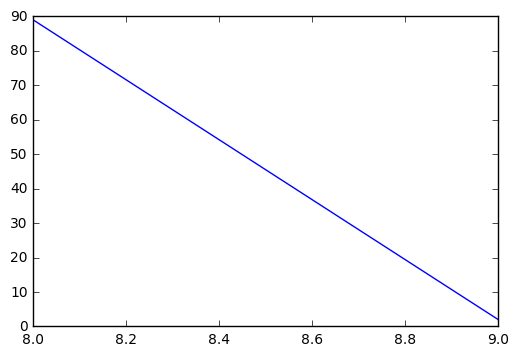

In [72]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))


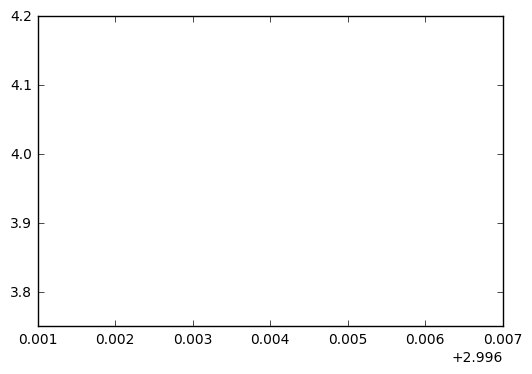

In [73]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [74]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [75]:

df['Request Details'].value_counts()


Building_commercial - Not_Offensive                 11
Mail_box - Not_Offensive                             9
Pole - Not_Offensive                                 8
Parking_meter - Not_Offensive                        7
Other_enter_additional_details_below - Offensive     7
Signal_box - Not_Offensive                           6
Transit_Shelter_Platform - Not_Offensive             6
Sidewalk_structure - Not_Offensive                   5
Building_residential - Not_Offensive                 4
Sidewalk_in_front_of_property - Not_Offensive        4
Building_residential - Offensive                     3
Sidewalk_in_front_of_property - Offensive            3
Mail_box - Offensive                                 3
Building_other - Not_Offensive                       3
Fire_hydrant - Not_Offensive                         3
Signal_box - Offensive                               2
Sign - Not_Offensive                                 2
Fire_hydrant - Offensive                             1
Transit_Sh

In [76]:
df['Supervisor District'].value_counts().sort_index()



1      2
3     13
4      1
5      6
6     21
8     16
9     25
10     7
Name: Supervisor District, dtype: int64

In [77]:
df.Neighborhood.value_counts()

Mission                    21
Mission Dolores            11
South of Market            10
Chinatown                   7
Civic Center                5
Nob Hill                    4
Tenderloin                  3
Potrero Hill                3
Mission Bay                 3
Bernal Heights              2
Lower Nob Hill              2
Japantown                   2
Castro                      2
Bret Harte                  1
Central Waterfront          1
Inner Richmond              1
Downtown / Union Square     1
Dolores Heights             1
Golden Gate Park            1
North Beach                 1
Lower Pacific Heights       1
Parkside                    1
Portola                     1
Buena Vista                 1
Name: Neighborhood, dtype: int64

In [78]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
8,6609677,2016-12-08 18:11:16,NaT,2016-12-08 18:38:52,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"3201 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752227503636, -122.416538722883)",Web Self Service,NaN
9,6609675,2016-12-08 18:10:40,NaT,2016-12-08 18:10:40,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,"3201 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752227503636, -122.416538722883)",Web Self Service,NaN
26,6609389,2016-12-08 16:22:14,NaT,2016-12-08 17:55:19,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of CAPP ST and 20TH ST,9,Mission,"(37.7586981701086, -122.417964865069)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849f92aa19793c74c4ff7/photo_20161208_162157.jpg
31,6609379,2016-12-08 16:20:05,NaT,2016-12-08 17:43:07,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of 14TH ST and JULIAN AVE,9,Mission,"(37.7681993877703, -122.421209982613)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849f8a619793c74c4fab/report.jpg
32,6609376,2016-12-08 16:19:20,NaT,2016-12-08 16:19:20,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Signal_box - Offensive,Intersection of 14TH ST and MISSION ST,9,Mission,"(37.7682735201071, -122.419981393661)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849f87a3da19793c74c4f8a/report.jpg
34,6609365,2016-12-08 16:17:32,NaT,2016-12-08 18:36:53,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"138 ERIE ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.769639638601, -122.417985282022)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849f8093da19793c74c4f4b/report.jpg
35,6609358,2016-12-08 16:16:53,NaT,2016-12-08 17:41:55,Open,Open,DPT SignShop 09 Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sign - Not_Offensive,Intersection of ERIE ST and SOUTH VAN NESS AVE,9,Mission,"(37.7691984845021, -122.417783028218)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849f7e73da19793c4c4f29/report.jpg
39,6609181,2016-12-08 15:32:05,NaT,2016-12-08 15:32:05,Open,accepted,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,Intersection of 24TH ST and SHOTWELL ST,9,Mission,"(37.7524396693588, -122.415172254237)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5849ed633da19793c74c4de4/report.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [79]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [81]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:3])


0    http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65fd3da19793c74c55aa/report.jpg
1    http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65b83da19793c74c55a0/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/584a589b3da19793c74c5557/report.jpg
Name: Media URL, dtype: object


In [82]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65fd3da19793c74c55aa/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65fd3da19793c74c55aa/report.jpg


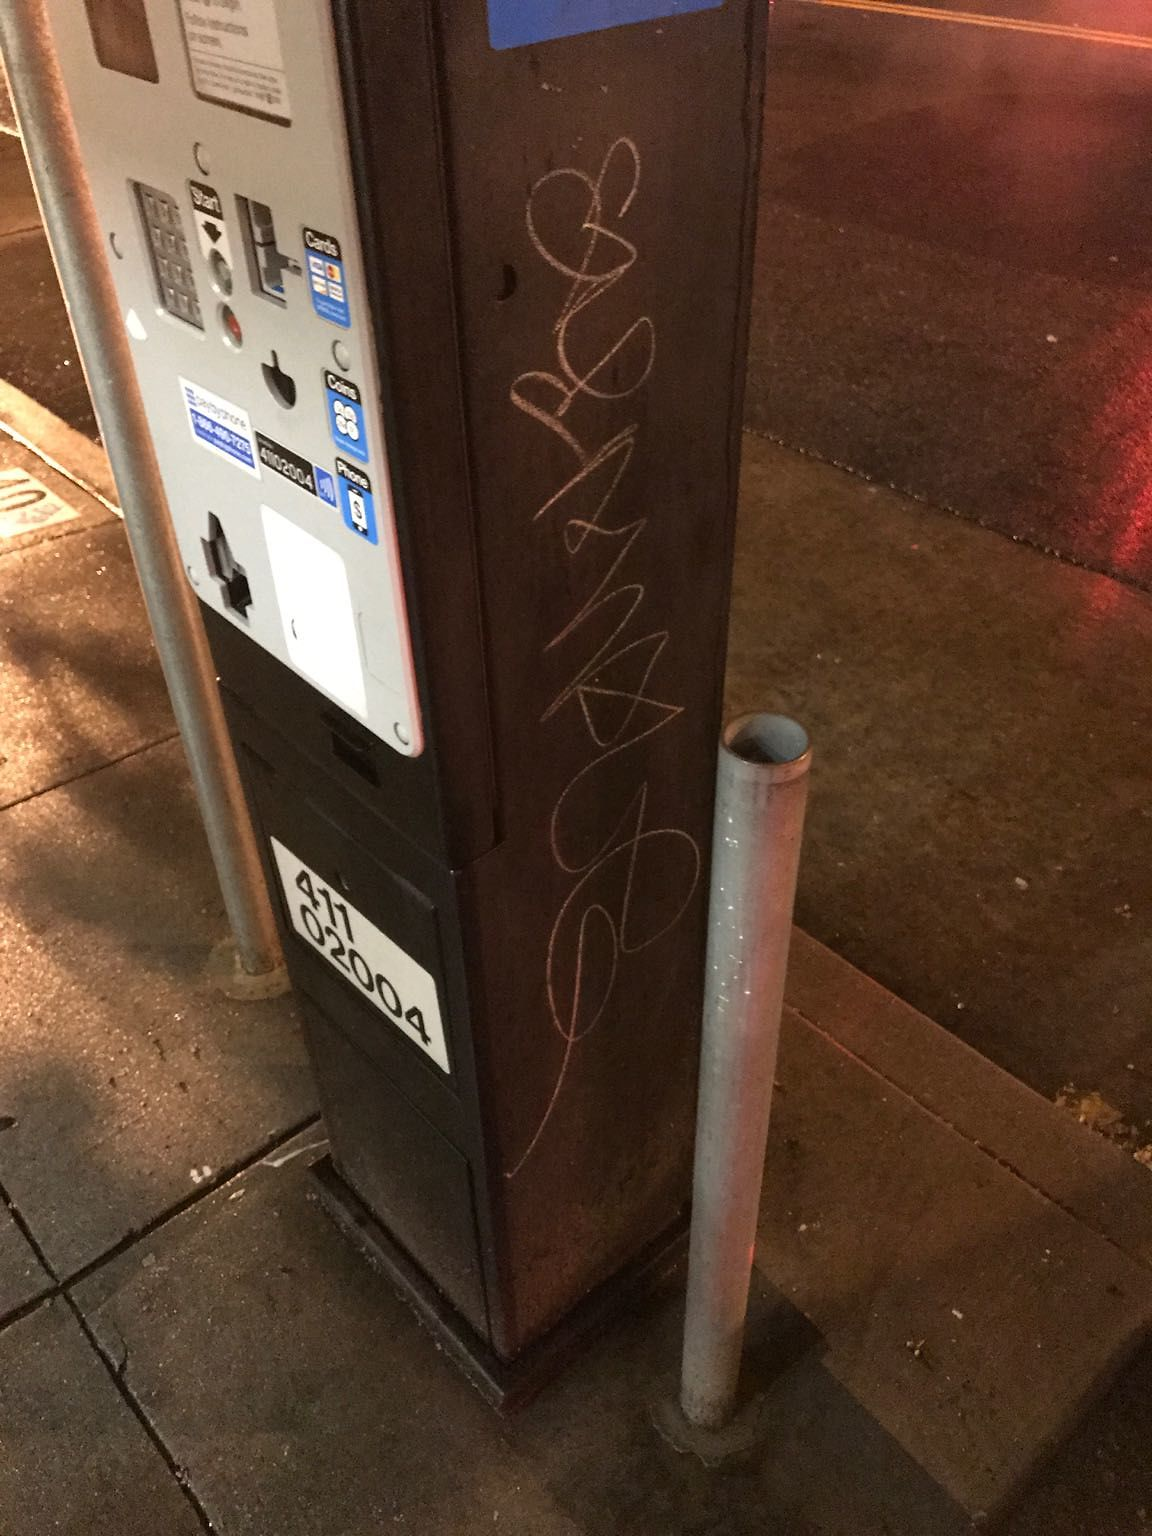

In [83]:
print(images[0])
Image(images[0])


In [84]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [85]:
images[:80].to_csv("./imagelist.txt", index=False)

In [54]:

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..


/home/gdillon/JupyterPractice/graffiti_SF311/assets
--2016-12-09 12:24:39--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322478 (315K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 314.92K  1.31MB/s    in 0.2s    

2016-12-09 12:24:39 (1.31 MB/s) - 'report.jpg' saved [322478/322478]

--2016-12-09 12:24:39--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 122845 (120K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>] 119.97K  --.-KB/s    in 0.001s  

2016-12-09 12:24:39 (149 MB/s) - 'report.j

In [26]:
#!convert -delay 50 *.jpg out.mp4


In [27]:
!ls


San+Fran +Graffiti pull one day.ipynb	 assets		pipevid.sh
San+Francisco+Graffiti with Video.ipynb  imagelist.txt


In [28]:
Image('report2.jpg')